In [1]:
pwd


'C:\\Users\\lenovo'

In [2]:
import pandas as pd
import tensorflow as tf

In [3]:
df=pd.read_csv('GOOG.csv')

In [4]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [5]:
df.shape

(1258, 14)

In [6]:
df1=df.reset_index()['close']

In [7]:
df1.head()

0    718.27
1    718.92
2    710.36
3    691.72
4    693.71
Name: close, dtype: float64

In [8]:
df1.shape

(1258,)

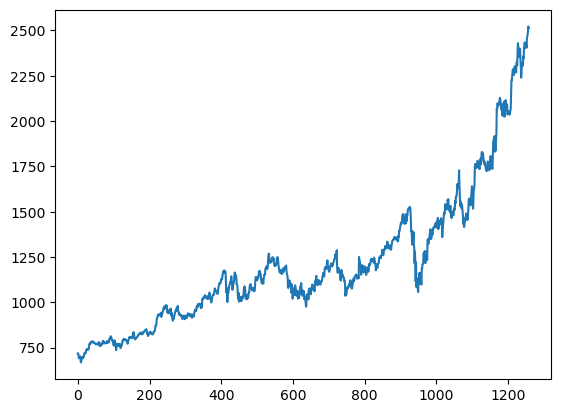

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
import numpy as np

In [11]:
df1

0        718.27
1        718.92
2        710.36
3        691.72
4        693.71
         ...   
1253    2466.09
1254    2482.85
1255    2491.40
1256    2521.60
1257    2513.93
Name: close, Length: 1258, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMax(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

NameError: name 'MinMax' is not defined

In [13]:
!pip install scikit-learn

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMax(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

NameError: name 'MinMax' is not defined

In [15]:
import scikit learn as sklearn

SyntaxError: invalid syntax (1203160093.py, line 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))


In [17]:
df1

array([[0.02698372],
       [0.02733443],
       [0.02271575],
       ...,
       [0.98370509],
       [1.        ],
       [0.99586153]])

In [18]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(817, 441)

In [20]:
import numpy 
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [48]:
X_test.shape

(340, 100, 1)

In [49]:
ytest.shape

(340,)

In [24]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test =X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [66]:
model=Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(loss='mae',optimizer='rmsprop')
model.fit(X_test, ytest, epochs=100, verbose=1)

Epoch 1/100
11/11 [==============================] - 7s 156ms/step - loss: 24082.8242
Epoch 2/100
11/11 [==============================] - 2s 151ms/step - loss: 0.1158
Epoch 3/100
11/11 [==============================] - 1s 124ms/step - loss: 0.1000
Epoch 4/100
11/11 [==============================] - 2s 138ms/step - loss: 0.0852
Epoch 5/100
11/11 [==============================] - 2s 155ms/step - loss: 0.0714
Epoch 6/100
11/11 [==============================] - 2s 156ms/step - loss: 0.0590
Epoch 7/100
11/11 [==============================] - 2s 157ms/step - loss: 0.0500
Epoch 8/100
11/11 [==============================] - 2s 152ms/step - loss: 0.0456
Epoch 9/100
11/11 [==============================] - 2s 155ms/step - loss: 0.0442
Epoch 10/100
11/11 [==============================] - 2s 156ms/step - loss: 0.0432
Epoch 11/100
11/11 [==============================] - 2s 154ms/step - loss: 0.0430
Epoch 12/100
11/11 [==============================] - 2s 145ms/step - loss: 0.0422
Epoch 13/

11/11 [==============================] - 2s 161ms/step - loss: 0.0321
Epoch 100/100
11/11 [==============================] - 1s 130ms/step - loss: 0.0331


In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [69]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 18ms/step


In [70]:
train_presict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [71]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.05244140237755571

In [72]:
math.sqrt(mean_squared_error(ytest,test_predict))

1776.1612709638853

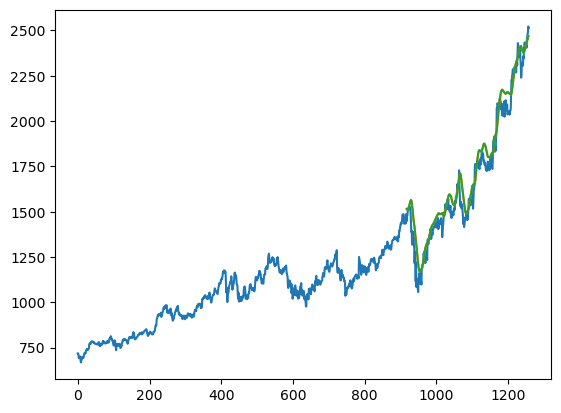

In [81]:
look_back=100
trainpredictPlot = numpy.empty_like(df1)
trainpredictPlot[:, :] = np.nan
trainpredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
trainpredictPlot = numpy.empty_like(df1)
trainpredictPlot[:, :] = numpy.nan
trainpredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictPlot)
plt.plot(trainpredictPlot)
plt.show()

In [82]:
len(test_data)

441

In [102]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [103]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [107]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
         x_input=np.array(temp_input[1:])
         print("{} day input {}".format(i,x_input))
         x_input=x_input.reshape(1,-1)
         x_input = x_input.reshape((1, n_steps, 1))
         #print(x_input)
         yhat = model.predict(x_input, verbose=0)
         print("{} day output {}".format(i,yhat))
         temp_input.extend(yhat[0].tolist())
         temp_input=temp_input[1:]
         #print(temp_input)
         lst_output.extend(yhat.tolist())
         i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.65988432 0.66517207 0.66428178 0.67390765 0.62726213 0.64470092
 0.62993299 0.66533394 0.67944899 0.75636958 0.75221492 0.77143967
 0.76869328 0.76362135 0.77002601 0.77030119 0.77473642 0.78433531
 0.78779393 0.78179935 0.77313391 0.75356923 0.75679584 0.7699127
 0.73548297 0.73845058 0.76254222 0.75948288 0.73297398 0.74504948
 0.7771267  0.73160348 0.74699731 0.7482545  0.7804882  0.75197212
 0.75443793 0.76848285 0.76770587 0.73810526 0.74187143 0.73938403
 0.7471376  0.74287503 0.74249733 0.73774375 0.7487509  0.74852968
 0.75559261 0.79288744 0.84026137 0.83982971 0.8532811  0.86178467
 0.87281341 0.85603829 0.86277208 0.85606527 0.87862993 0.87922346
 0.88172704 0.87699505 0.87681159 0.86312279 0.88868745 0.89486009
 0.8842738  0.92354884 0.95051637 0.93984914 0.93178262 0.90970356
 0.91104708 0.92432581 0.93368189 0.90291042 0.88515869 0.8475617
 0.85991237 0.88915148 0.8919842  0.8822828  0.88513171 0.91069636
 0.90476653 0.93798763 0.93928259 0.95248039 0.93574

8 day output [[1.0113636]]
9 day input [0.75636958 0.75221492 0.77143967 0.76869328 0.76362135 0.77002601
 0.77030119 0.77473642 0.78433531 0.78779393 0.78179935 0.77313391
 0.75356923 0.75679584 0.7699127  0.73548297 0.73845058 0.76254222
 0.75948288 0.73297398 0.74504948 0.7771267  0.73160348 0.74699731
 0.7482545  0.7804882  0.75197212 0.75443793 0.76848285 0.76770587
 0.73810526 0.74187143 0.73938403 0.7471376  0.74287503 0.74249733
 0.73774375 0.7487509  0.74852968 0.75559261 0.79288744 0.84026137
 0.83982971 0.8532811  0.86178467 0.87281341 0.85603829 0.86277208
 0.85606527 0.87862993 0.87922346 0.88172704 0.87699505 0.87681159
 0.86312279 0.88868745 0.89486009 0.8842738  0.92354884 0.95051637
 0.93984914 0.93178262 0.90970356 0.91104708 0.92432581 0.93368189
 0.90291042 0.88515869 0.8475617  0.85991237 0.88915148 0.8919842
 0.8822828  0.88513171 0.91069636 0.90476653 0.93798763 0.93928259
 0.95248039 0.93574304 0.94062611 0.9504732  0.9458707  0.93687613
 0.96231668 0.97004867 0

17 day output [[1.0330268]]
18 day input [0.78779393 0.78179935 0.77313391 0.75356923 0.75679584 0.7699127
 0.73548297 0.73845058 0.76254222 0.75948288 0.73297398 0.74504948
 0.7771267  0.73160348 0.74699731 0.7482545  0.7804882  0.75197212
 0.75443793 0.76848285 0.76770587 0.73810526 0.74187143 0.73938403
 0.7471376  0.74287503 0.74249733 0.73774375 0.7487509  0.74852968
 0.75559261 0.79288744 0.84026137 0.83982971 0.8532811  0.86178467
 0.87281341 0.85603829 0.86277208 0.85606527 0.87862993 0.87922346
 0.88172704 0.87699505 0.87681159 0.86312279 0.88868745 0.89486009
 0.8842738  0.92354884 0.95051637 0.93984914 0.93178262 0.90970356
 0.91104708 0.92432581 0.93368189 0.90291042 0.88515869 0.8475617
 0.85991237 0.88915148 0.8919842  0.8822828  0.88513171 0.91069636
 0.90476653 0.93798763 0.93928259 0.95248039 0.93574304 0.94062611
 0.9504732  0.9458707  0.93687613 0.96231668 0.97004867 0.9790918
 0.98370509 1.         0.99586153 0.98280883 0.98714852 0.99093914
 0.99435157 0.99750602 1

26 day output [[1.0524036]]
27 day input [0.75948288 0.73297398 0.74504948 0.7771267  0.73160348 0.74699731
 0.7482545  0.7804882  0.75197212 0.75443793 0.76848285 0.76770587
 0.73810526 0.74187143 0.73938403 0.7471376  0.74287503 0.74249733
 0.73774375 0.7487509  0.74852968 0.75559261 0.79288744 0.84026137
 0.83982971 0.8532811  0.86178467 0.87281341 0.85603829 0.86277208
 0.85606527 0.87862993 0.87922346 0.88172704 0.87699505 0.87681159
 0.86312279 0.88868745 0.89486009 0.8842738  0.92354884 0.95051637
 0.93984914 0.93178262 0.90970356 0.91104708 0.92432581 0.93368189
 0.90291042 0.88515869 0.8475617  0.85991237 0.88915148 0.8919842
 0.8822828  0.88513171 0.91069636 0.90476653 0.93798763 0.93928259
 0.95248039 0.93574304 0.94062611 0.9504732  0.9458707  0.93687613
 0.96231668 0.97004867 0.9790918  0.98370509 1.         0.99586153
 0.98280883 0.98714852 0.99093914 0.99435157 0.99750602 1.00048053
 1.00332582 1.00607514 1.00874984 1.01136363 1.01392567 1.0164423
 1.0189172  1.02135336 

In [108]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [109]:
import matplotlib.pyplot as plt

In [110]:
len(df1-100)

1258

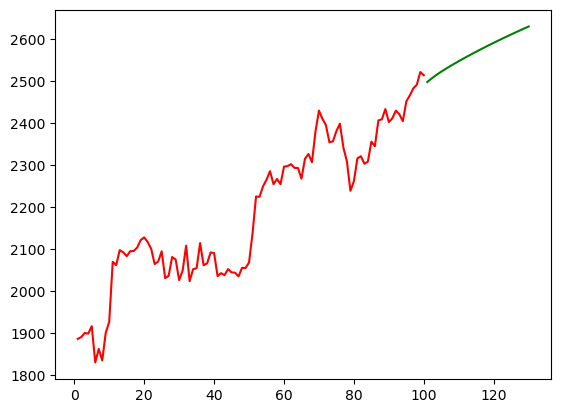

In [112]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]) , color="red")
plt.plot(day_pred,scaler.inverse_transform(lst_output) , color="green")

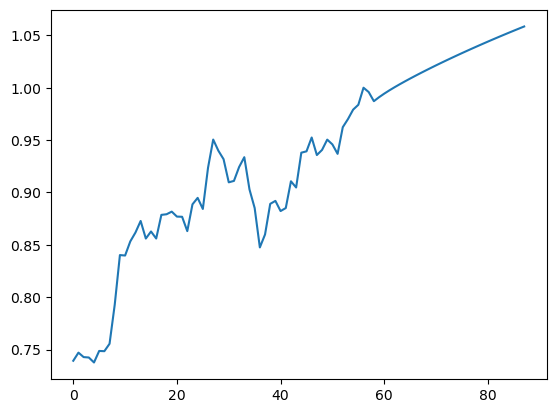

In [113]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:] )

In [114]:
df3=scaler.inverse_transform(df3).tolist()

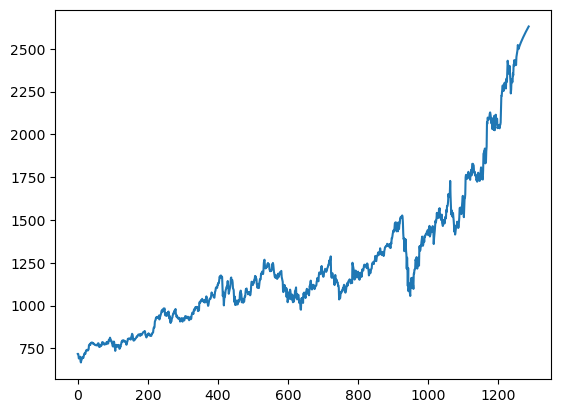

In [115]:
plt.plot(df3)
